<a href="https://colab.research.google.com/github/harkpun/Google-Play-Store-Analysis/blob/main/Play_Store_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# mounting notebook on google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# reading both CSV Files From Drive and storing in dataframe
ps_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project - EDA/Play Store Data.csv')
ur_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project - EDA/User Reviews.csv')

# **Exploring Dataset**

**Apps dataset columns descriptions:**

There are 9 features that describe a given app.

* **App:** Name of the app
* **Category:** Category of the app.
* **Rating**: The current average rating (out of 5) of the app on Google Play
* **Reviews**: Number of user reviews given on the app
* **Size:** Size of the app in MB (megabytes)
* **Installs:** Number of times the app was downloaded from Google Play
* **Type**: Whether the app is paid or free
* **Price**: Price of the app in US$
* **Last Updated**: Date on which the app was last updated on Google Play

In [4]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
ps_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
ps_df.shape

(10841, 13)

In [7]:
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [10]:
# droping current version and android version columns which are not much that important from play store dataframe.
ps_df.drop(['Current Ver', 'Android Ver'], axis=1, inplace=True)

In [11]:
ps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
dtype: int64

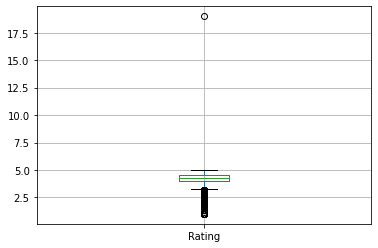

In [12]:
# checking for the oulier 
ps_df.boxplot()

In [13]:
# checking how many rating are more than 5 outlier
ps_df[ps_df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19


In [14]:
# deleting outlier row to getting proper insights from dataframe
ps_df.drop([10472], inplace=True)

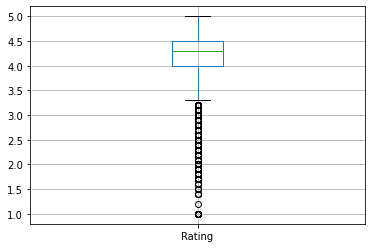

In [15]:
ps_df.boxplot()
plt.show()

# **Type Casting**

In [16]:
def printinfo():
    temp = pd.DataFrame(index=ps_df.columns)
    temp['data_type'] = ps_df.dtypes
    temp['null_count'] = ps_df.isnull().sum()
    temp['unique_count'] = ps_df.nunique()
    return temp

printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,1474,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,1,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


Converting
* Reviews
* Size
* Installs
* Price 

to numeric.

In [17]:
# converting Reviews column from object to numeric dtype  
ps_df['Reviews'] = ps_df['Reviews'].astype(int)

In [18]:
# converting Price column from object to numeric dtype
ps_df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [19]:
ps_df['Price'] = ps_df['Price'].apply(lambda x : str(x).replace('$','') if '$' in str(x) else str(x))
ps_df['Price'] = round(ps_df['Price'].apply(lambda x : float(x)))

In [20]:
# converting Installs column from object to numeric dtype
ps_df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [21]:
ps_df['Installs'] = ps_df['Installs'].apply(lambda x : str(x).replace('+','') if '+' in str(x) else str(x))
ps_df['Installs'] = ps_df['Installs'].apply(lambda x : str(x).replace(',','') if ',' in str(x) else str(x))
ps_df['Installs'] = ps_df['Installs'].apply(lambda x : int(x))

In [22]:
# converting Size column from oject to numeric dtype
ps_df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [23]:
#converting Kb into Mb
ps_df['Size'] = ps_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
ps_df['Size'] = ps_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
ps_df['Size'] = ps_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
ps_df['Size'] = ps_df['Size'].apply(lambda x: float(x))

In [24]:
#Converting Last Updated column from string to Timestamp
ps_df['Last Updated'] = pd.to_datetime(ps_df['Last Updated'])

In [25]:
# new column - Total Earning based on number of Installs 
ps_df['Total Earning'] = ps_df['Installs']*ps_df['Price']

In [26]:
ps_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Total Earning
1648,SleepyTime: Bedtime Calculator,LIFESTYLE,4.4,19621,NaN,500000,Free,0.0,Everyone,Lifestyle,2016-02-27,0.0
8916,Portes du Soleil,SPORTS,3.1,500,39.0,50000,Free,0.0,Everyone,Sports,2018-02-16,0.0
6629,BQ-መጽሐፍ ቅዱሳዊ ጥያቄዎች,GAME,4.7,191,7.2,5000,Free,0.0,Everyone,Trivia,2018-07-31,0.0
3955,Cardi B Piano Game,GAME,3.1,50,7.4,10000,Free,0.0,Everyone,Music,2017-11-15,0.0
9466,パーリーゲイツ公式通販｜EJ STYLE（イージェイスタイル）,SHOPPING,NaN,1,9.3,100,Free,0.0,Everyone,Shopping,2017-11-16,0.0


In [27]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,1474,39
Reviews,int64,0,6001
Size,float64,1695,459
Installs,int64,0,20
Type,object,1,2
Price,float64,0,41
Content Rating,object,0,6
Genres,object,0,119


# **Data Imputation**

In [28]:
def impute_median(column):
  '''
  Imputing median value as NaN value for Numerical datatype.
  For 'Rating' and 'Size' column - Replacing NaN values with the median of a DataFrame column.
  '''
  return column.fillna(column.median(), inplace=True)

In [29]:
# replacing NaN values with median value for Rating column
impute_median(ps_df['Size'])

In [30]:
# replacing NaN values with median value for Rating column
impute_median(ps_df['Rating'])

In [31]:
def impute_mode(column):
  '''
  Imputing mode value as NaN value for Categorical datatype.
  For 'Type' column - Replacing NaN values with the mode of a DataFrame column.
  '''
  return column.fillna(str(column.mode()), inplace=True)

In [32]:
# replacing NaN values with mode value for Type column
impute_mode(ps_df['Type'])

In [33]:
ps_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Total Earning
5077,AppLock,TOOLS,4.4,4931562,13.0,100000000,Free,0.0,Everyone,Tools,2018-06-11,0.0
10194,Soccer 2018,SPORTS,3.5,172373,47.0,10000000,Free,0.0,Everyone,Sports,2018-07-12,0.0
7212,MCQ CE IT,FAMILY,5.0,22,3.6,1000,Free,0.0,Everyone,Education,2017-11-07,0.0
8379,DG-App,TOOLS,5.0,1,4.5,500,Free,0.0,Everyone,Tools,2017-11-29,0.0
8250,DC Super Hero Girls™,FAMILY,4.3,43090,95.0,5000000,Free,0.0,Everyone,Action;Action & Adventure,2018-06-29,0.0


In [34]:
ps_df.describe()

,Rating,Reviews,Size,Installs,Price,Total Earning
count,10840.000000,1.084000e+04,10840.00000,1.084000e+04,10840.000000,1.084000e+04
mean,4.206476,4.441529e+05,20.18484,1.546434e+07,1.023616,3.575127e+04
std,0.480342,2.927761e+06,20.97683,8.502936e+07,15.949766,1.067125e+06
min,1.000000,0.000000e+00,0.00850,0.000000e+00,0.000000,0.000000e+00
25%,4.100000,3.800000e+01,5.90000,1.000000e+03,0.000000,0.000000e+00
50%,4.300000,2.094000e+03,13.00000,1.000000e+05,0.000000,0.000000e+00
75%,4.500000,5.477550e+04,26.00000,5.000000e+06,0.000000,0.000000e+00
max,5.000000,7.815831e+07,100.00000,1.000000e+09,400.000000,7.000000e+07


In [35]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,float64,0,459
Installs,int64,0,20
Type,object,0,3
Price,float64,0,41
Content Rating,object,0,6
Genres,object,0,119


# **Data Cleaning**

In [36]:
ps_df.App.value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

**From the above data we can infer that there are lots of duplicate values for the same app. To remove the duplicate values we will first sort the dataframe by 'Last Updated' date in descending order then we will remove the duplicates. In this way we will have the information for the latest entry in the database.**

In [37]:
# for example ROBLOX app, it should be either from game category or from family catagoty.
ps_df[ps_df['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Total Earning
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,0.0
1701,ROBLOX,GAME,4.5,4447346,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,0.0
1748,ROBLOX,GAME,4.5,4448791,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,0.0
1841,ROBLOX,GAME,4.5,4449882,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,0.0
1870,ROBLOX,GAME,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,0.0
2016,ROBLOX,FAMILY,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,0.0
2088,ROBLOX,FAMILY,4.5,4450855,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,0.0
2206,ROBLOX,FAMILY,4.5,4450890,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,0.0
4527,ROBLOX,FAMILY,4.5,4443407,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,0.0


In [38]:
# sorting the dataset in descending order of Last Updated date.
ps_df.sort_values(by = 'Last Updated', ascending = False, inplace = True)

In [39]:
# deleting the duplicate entries of App.
ps_df.drop_duplicates(subset = ['App'], inplace = True)

In [40]:
ps_df['App'].nunique()

9659

In [41]:
ps_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Total Earning
2389,Block Buddy,MEDICAL,4.0,15,5.0,1000,Paid,15.0,Everyone,Medical,2018-08-01,15000.0
8681,Download Instant DP (Full HD),TOOLS,4.3,1283,4.4,100000,Free,0.0,Everyone,Tools,2018-08-04,0.0
10607,"News-Journal-Daytona Beach, FL",NEWS_AND_MAGAZINES,4.5,76,7.8,5000,Free,0.0,Everyone,News & Magazines,2018-07-03,0.0
9455,EJ messenger,COMMUNICATION,5.0,1,25.0,10,Free,0.0,Teen,Communication,2017-10-18,0.0
1274,Sleep Sounds,HEALTH_AND_FITNESS,4.8,51227,28.0,1000000,Free,0.0,Everyone,Health & Fitness,2018-07-13,0.0


In [42]:
ps_df.shape

(9659, 12)

##**User_Review dataframe.**

In [43]:
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [44]:
ur_df.shape

(64295, 5)

In [45]:
ur_df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [46]:
# removing all the NaN value rows from user_review dataframe.
ur_df.dropna(inplace = True)

In [47]:
ur_df.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [48]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [49]:
ur_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [50]:
ur_df.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
46782,Flashlight HD LED,Keeps lit!! I daily. Feature set pretty rich. ...,Positive,0.264583,0.645833
9752,Aviary Effects: Classic,"SOS I want give a,bad review looks really grea...",Positive,0.350000,0.750000
19228,CALCU™ Stylish Calculator Free,I lI like themes,Neutral,0.000000,0.000000
19926,CIA - Caller ID & Call Blocker,Unbelievable expected GREAT 5*plus,Positive,0.150000,0.716667
38701,"Easy - taxi, car, ridesharing",Impossible live without South America,Negative,-0.265152,0.750000


In [51]:
ur_df.shape

(37427, 5)

# **Data Visualization**


## **Graph 1 - Number of apps based on Category**

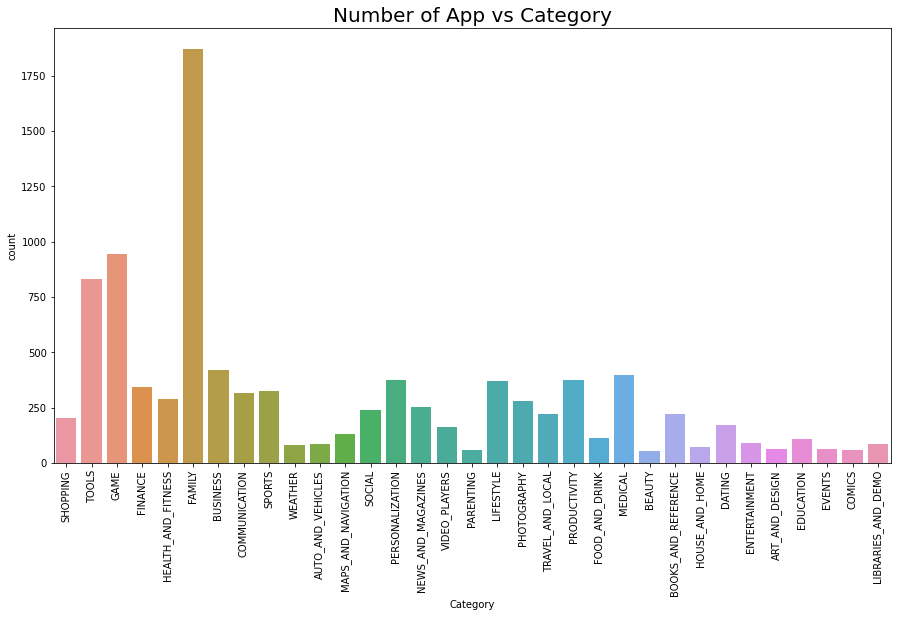

In [52]:
plt.figure(figsize=(15,8))
plt.title('Number of App vs Category', fontsize=20)

sns.countplot(x='Category', data=ps_df)
plt.xticks(rotation=90)
plt.show()

### **Observation:** 
1. **FAMILY category has the highest number of apps and BEAUTY category has lowest number of apps.** 
2. **Top 5 category in the play store which have most number of apps are - FAMILY, GAME, TOOLS, BUSINESS & MEDICAL.** 

## **Graph 2 - Category wise number of installs.**

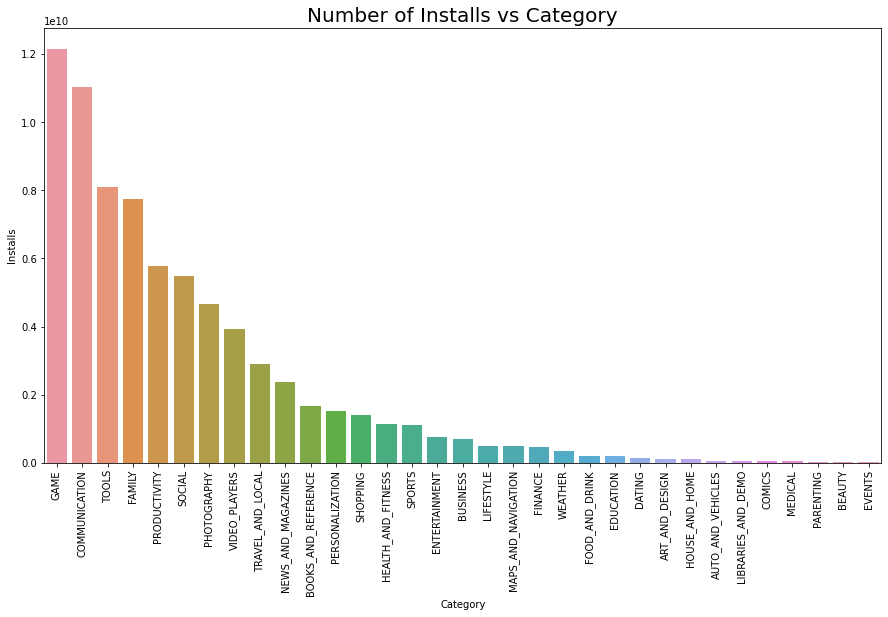

In [53]:
cat_install = ps_df.groupby(['Category'])[['Installs']].sum().reset_index()
cat_install.sort_values(by='Installs', ascending=False, inplace=True)

plt.figure(figsize=(15,8))
plt.title('Number of Installs vs Category', fontsize=20)

sns.barplot(x ='Category', y='Installs', data=cat_install)
plt.xticks(rotation=90)
plt.show()

### **Observation:**
1. **GAME category has highest number of installs and EVENTS category has lowest number of installs.**
2. **Top 5 categories with most number of installs are - GAME, COMMUNICATION, TOOLS, FAMILY and PRODUCTIVITY.**
 

## **Graph 3 - Distribution of Rating**

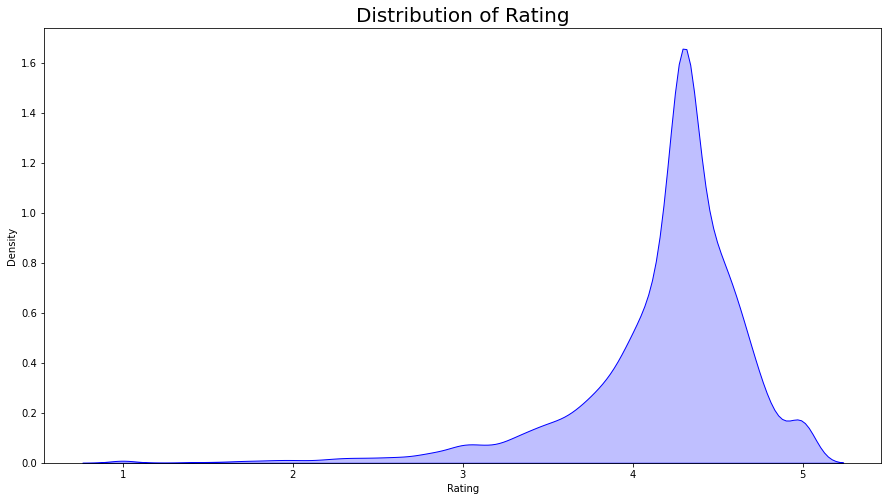

In [54]:
plt.figure(figsize=(15,8))
plt.title('Distribution of Rating', fontsize=20)

sns.kdeplot(ps_df.Rating, color="Blue", shade = True)
plt.show()

### **Observation:**
1. **Most of the apps in the google play store are rated between 3.5 to 4.7**

## **Graph 4 - Box plot to show Rating vs Category**

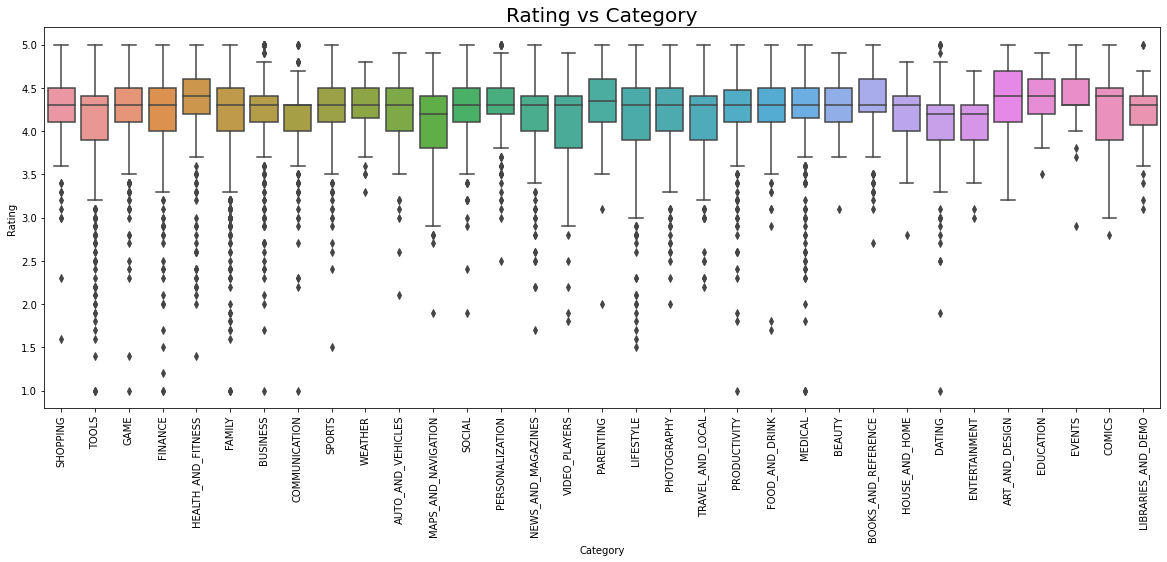

In [55]:
plt.figure(figsize=(20,7))
plt.title("Rating vs Category", fontsize=20)

sns.boxplot(x='Category', y='Rating', data=ps_df)
plt.xticks(rotation = 90)
plt.show()

In [56]:
cat_rating = ps_df.groupby(['Category'])['Rating'].median().reset_index(name = 'median')
cat_rating.sort_values(by ='median', ascending = False, inplace = True)
cat_rating.head()

,Category,median
0,ART_AND_DESIGN,4.40
5,COMICS,4.40
15,HEALTH_AND_FITNESS,4.40
8,EDUCATION,4.40
22,PARENTING,4.35


In [57]:
cat_rating.tail()

,Category,median
2,BEAUTY,4.3
32,WEATHER,4.3
19,MAPS_AND_NAVIGATION,4.2
9,ENTERTAINMENT,4.2
7,DATING,4.2


### **Observation:**
1. **Top 5 Category with highest ratings are - EVENTS, ART_AND_DESIGN, COMICS, EDUCATION, HEALTH_AND_FITNESS**
2. **Last 5 Category with lowest ratings are- DATING, ENTERTAINMENT, MAPS_AND_NAVIGATION, WEATHER, BEAUTY**

## **Graph 5 - Number of Apps vs Genres**

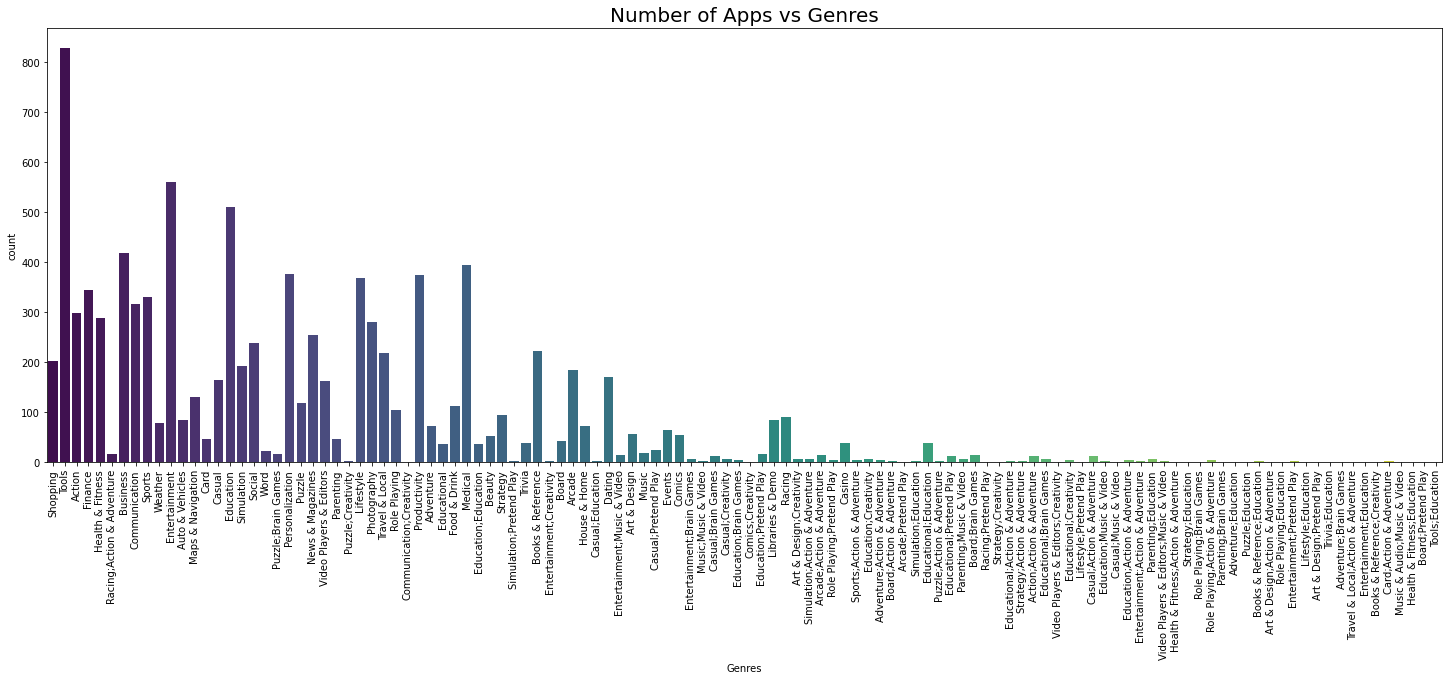

In [58]:
plt.figure(figsize=(25,8))
plt.title("Number of Apps vs Genres", fontsize=20)

ax=sns.countplot(x = 'Genres', data = ps_df, palette= "viridis")
plt.xticks(rotation = 90)
plt.show()

In [59]:
gen_count = ps_df.groupby(['Genres']).size().reset_index(name = 'count')
gen_count.sort_values(by ='count', ascending = False, inplace = True)
gen_count.head()

,Genres,count
107,Tools,828
51,Entertainment,561
38,Education,510
22,Business,419
70,Medical,395


In [60]:
gen_count.tail()

,Genres,count
86,Puzzle;Education,1
76,Parenting;Brain Games,1
5,Adventure;Education,1
31,Casual;Music & Video,1
12,Art & Design;Pretend Play,1


### **Observation:**
1. **Least number of apps in play store are - Puzzle;Education, Parenting;Brain Games, Adventure;Education, Casual;Music & Video, Art & Design;Pretend Play.**
2. **Most number of apps in play store are - Tools, Entertainment, Education, Business & Medical.**

## **Graph 6 - Top 10 installed apps in any category:**

In [61]:
ps_df.Category.value_counts()

FAMILY                 1873
GAME                    942
TOOLS                   829
BUSINESS                419
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           316
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               108
ENTERTAINMENT            88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           73
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [62]:
def findtop10incategory(str):
  '''
  This function used for find out top 10 app present in Category column,
  with thier each respective category.
  '''
  str = str.upper()
  top10 = ps_df[ps_df['Category'] == str]
  top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
  
  plt.figure(figsize=(15,12))
  plt.title(f'Top 10 Installed Apps in {str} category',size = 20)  
  
  graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
  plt.xticks(rotation=90)

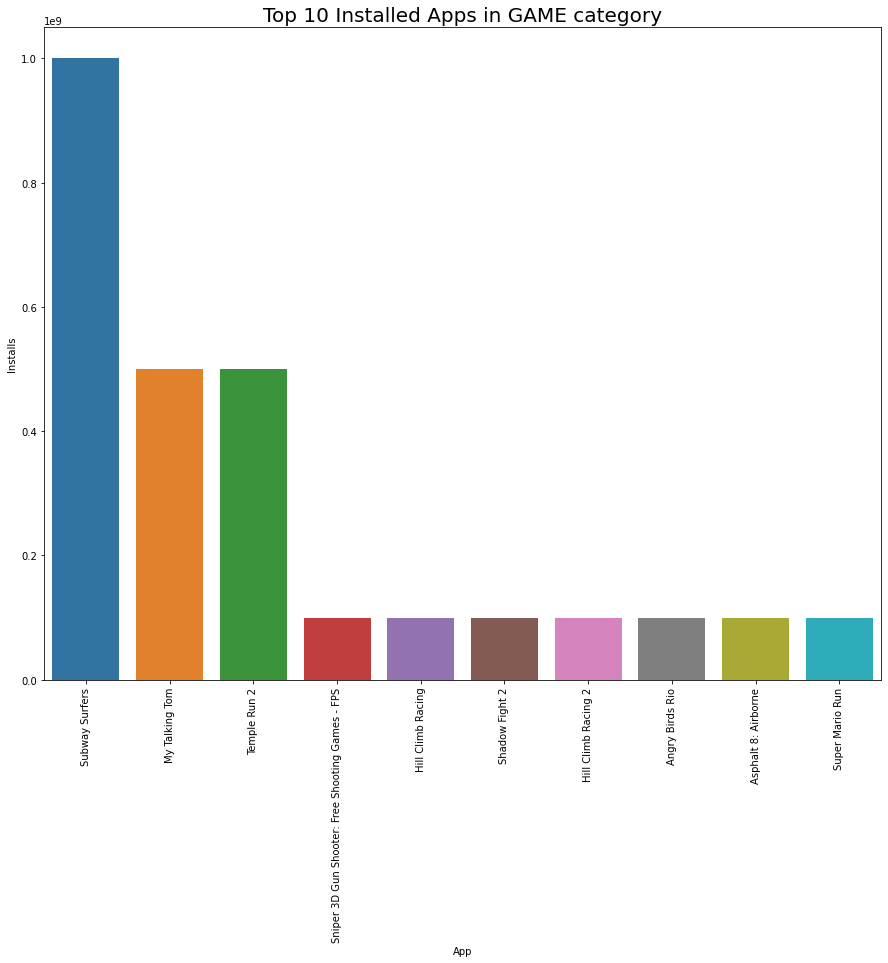

In [63]:
findtop10incategory('GAME')

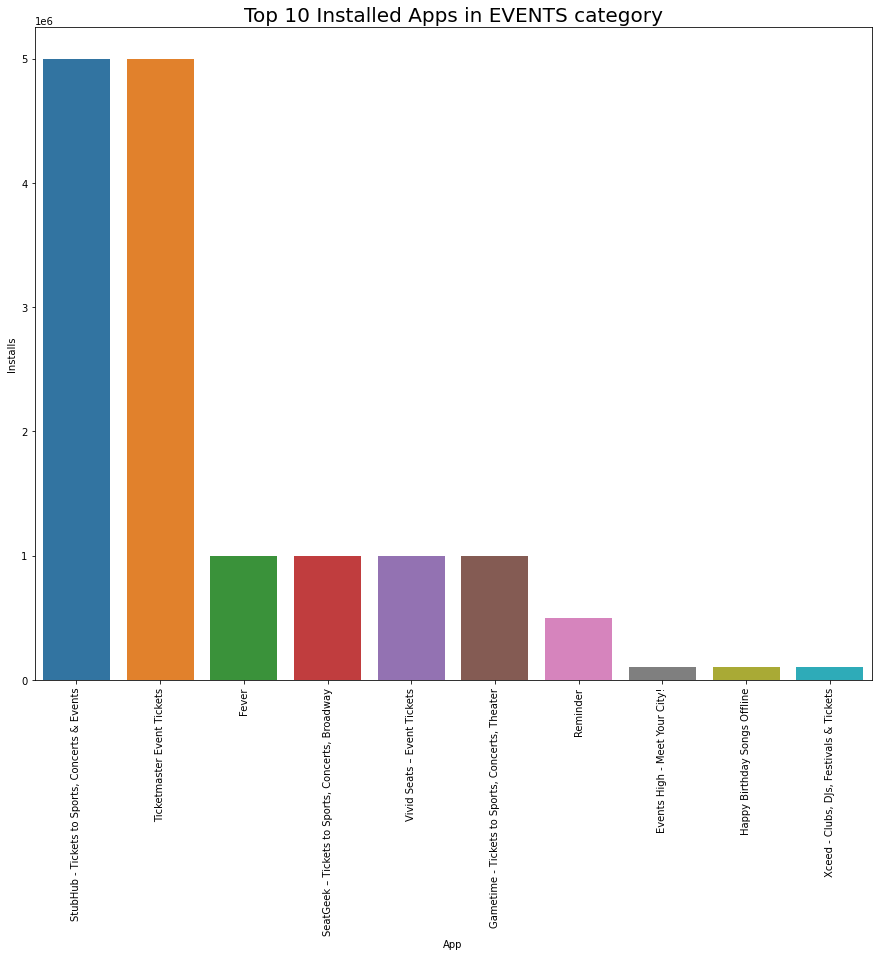

In [64]:
findtop10incategory('EVENTS')

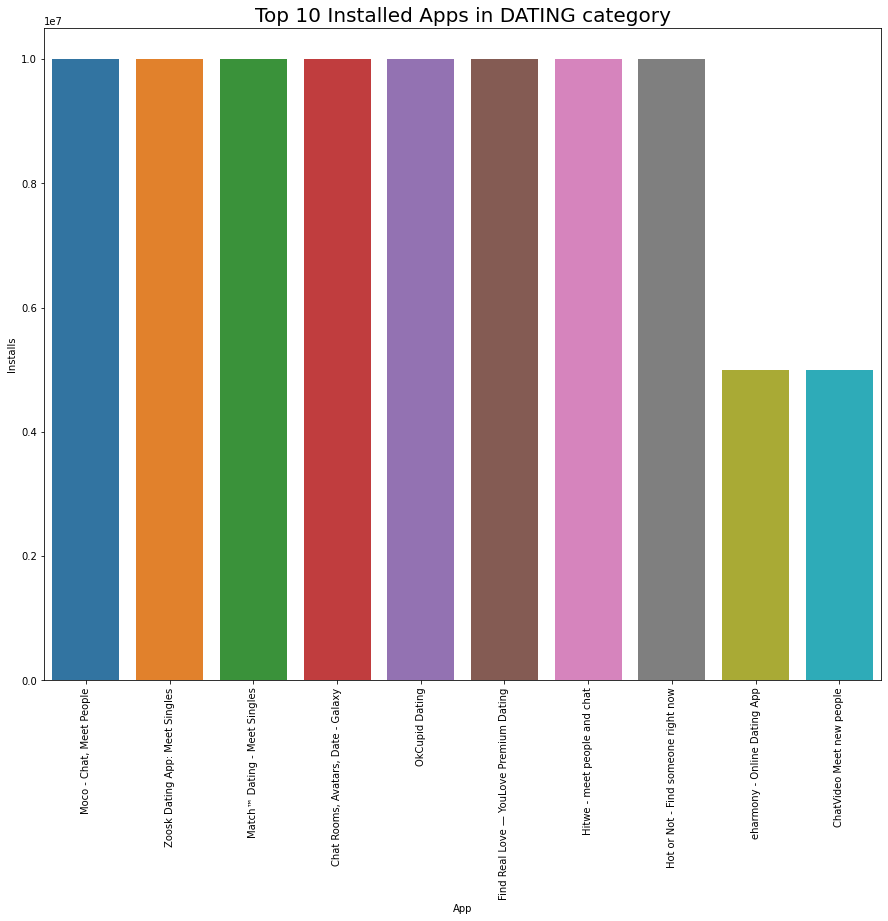

In [65]:
findtop10incategory('DATING')

## **Graph 7 - Number of Apps vs Content Rating:**

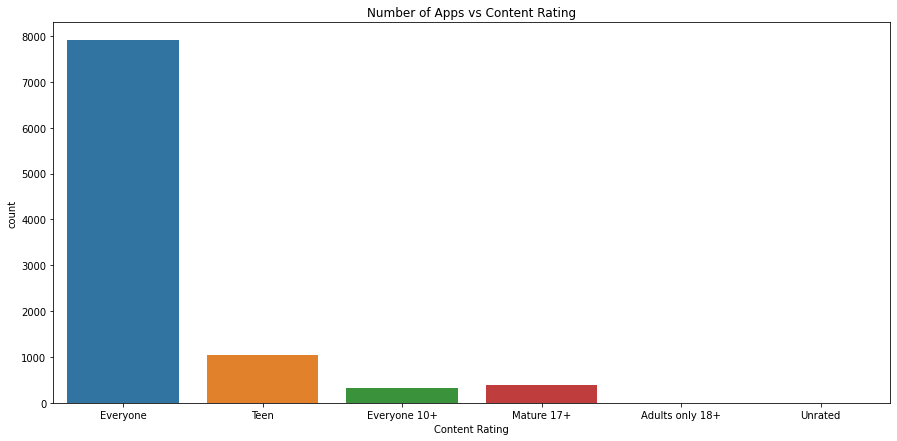

In [66]:
plt.figure(figsize=(15,7))
plt.title("Number of Apps vs Content Rating")

sns.countplot(x = 'Content Rating', data = ps_df)
plt.show()

### **Observation:**
1. **Most of the apps in the play store are with content rating Everyone.**

## **Graph 8 - Content Rating vs Rating:**

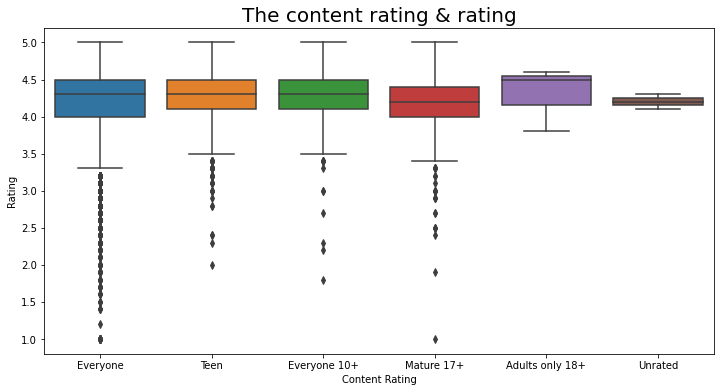

In [67]:
plt.figure(figsize=(12,6))
plt.title("The content rating & rating", size=20)

sns.boxplot(x = "Content Rating", y = "Rating", data = ps_df)
plt.show()

### **Observation:**
1. **The ratings are almost the same for Everyone, Teen, Everyone 10+.**
2. **The Everyone has more outliers than other categories.**
3. **Mature 17+ has the lowest average. The rating average of the 18+ category is higher than the others.**

## **Graph 9 -  Apps that have made the highest-earning**

In [ ]:
Paid_Apps_df = ps_df[ps_df['Type'] == 'Paid']
earning_df = Paid_Apps_df[['App', 'Installs', 'Price']]
earning_df['Earnings'] = earning_df['Installs'] * earning_df['Price']

In [69]:
earning_df_sorted_by_Earnings = earning_df.sort_values(by='Earnings', ascending=False).head(50)
earning_df_sorted_by_Price = earning_df_sorted_by_Earnings.sort_values(by='Price', ascending=False)

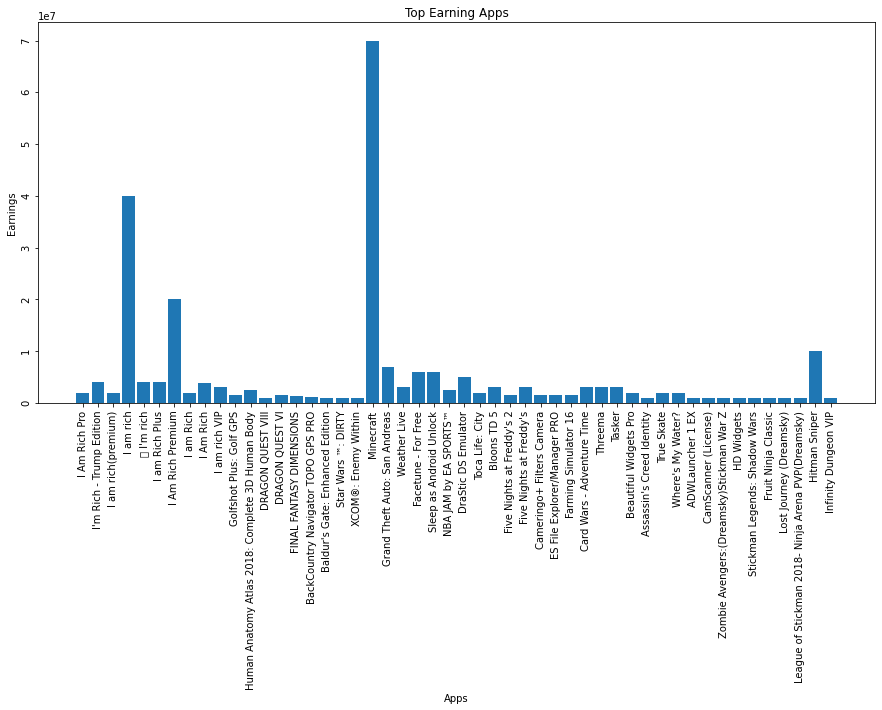

In [103]:
plt.figure(figsize=(15,7))
plt.title("Top Earning Apps")
plt.xlabel("Apps")
plt.ylabel("Earnings")

plt.bar(earning_df_sorted_by_Price.App, earning_df_sorted_by_Price.Earnings, width=0.85, label=earning_df_sorted_by_Price.Earnings)
plt.tick_params(rotation=90)
plt.show()

### **Observation:**
**The top five apps with the highest earnings found on google play store are:-**
* **Minecraft, I am Rich**
* **I am Rich Premium**
* **Hitman Sniper**
* **Grand Theft Auto: San Andreas**

## **Graph 10 - Expensive App Distribution:**

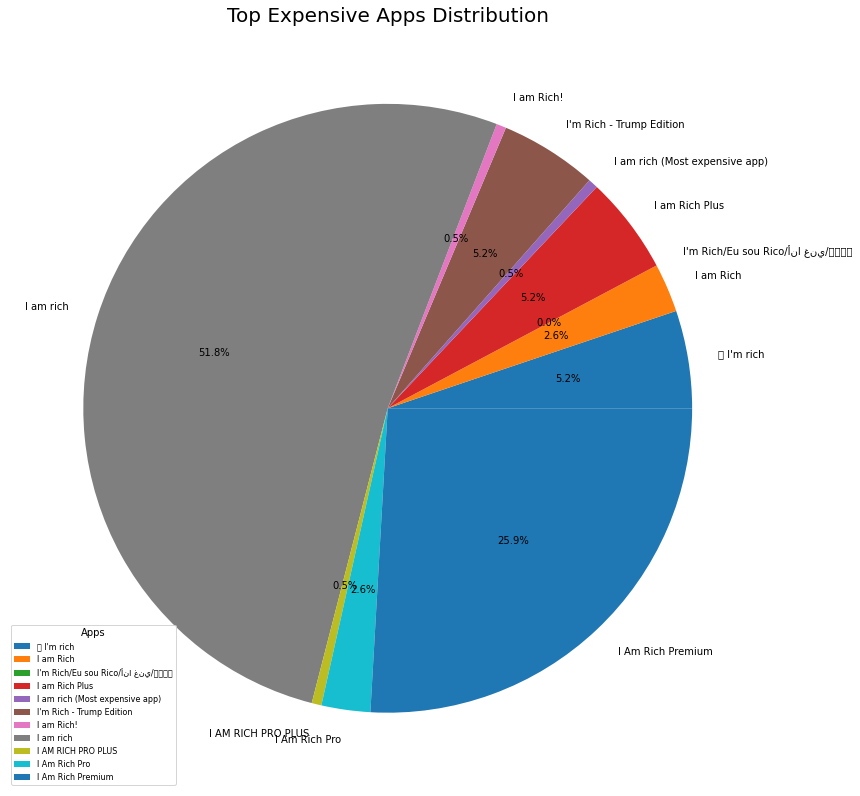

In [94]:
top10PaidApps = ps_df[ps_df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)

plt.figure(figsize=(14,14))
plt.title('Top Expensive Apps Distribution',size = 20)

plt.pie(top10PaidApps.Installs, explode=None, labels=top10PaidApps.App, autopct='%1.1f%%')
plt.legend(top10PaidApps.App, loc="lower left", title="Apps", fontsize=8)
plt.show()

### **Observation:**
1. **Highest distribution of app is 'I am rich', 'I Am Rich Premium', "I'm rich-Trump Edition".**


## **Graph 11 - Category vs Price :**

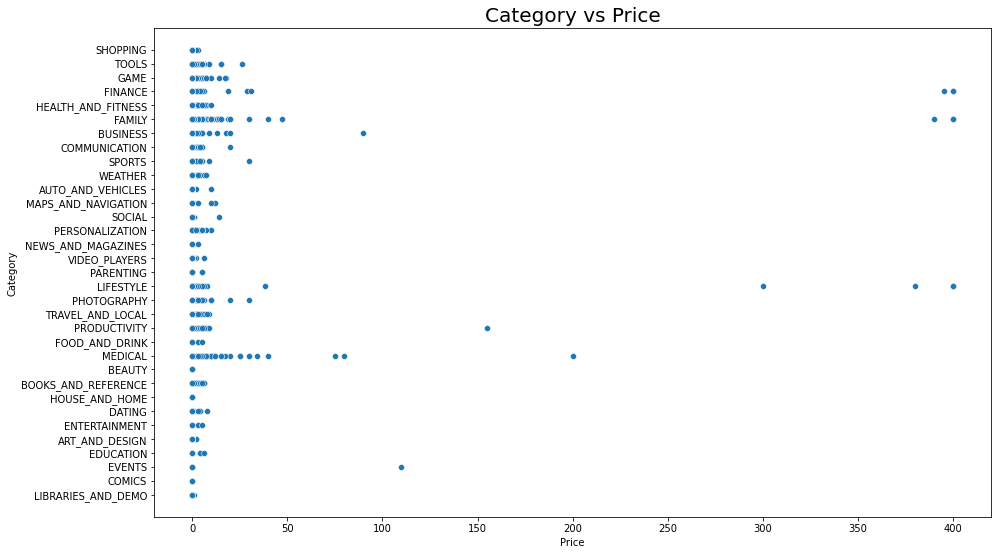

In [72]:
plt.figure(figsize=(15,9))
plt.title("Category vs Price", size=20)

sns.scatterplot(y = "Category", x = "Price", data = ps_df)
plt.show()

### **Observation:**
1. **The highest paid applications are FINANCE, LIFESTYLE, and FAMILY.**

## **Graph 12 - Pie Chart to find the percentage of Free apps and Paid apps.**

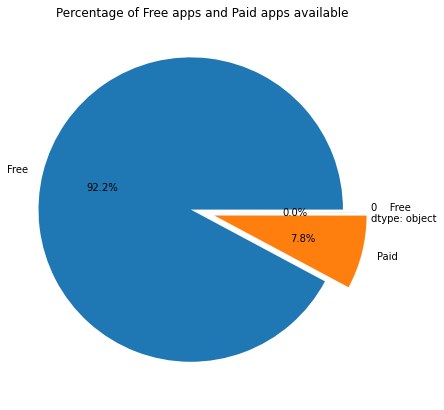

In [73]:
plt.figure(figsize = (7,7))
plt.title('Percentage of Free apps and Paid apps available')

ps_df['Type'].value_counts().plot.pie(autopct = '%1.1f%%', explode=(0.08,0.08,0.01))
plt.axis('off')
plt.show()

## **Graph 13 - Bar Chart to show Number of Installs vs Category with Type of the app**

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


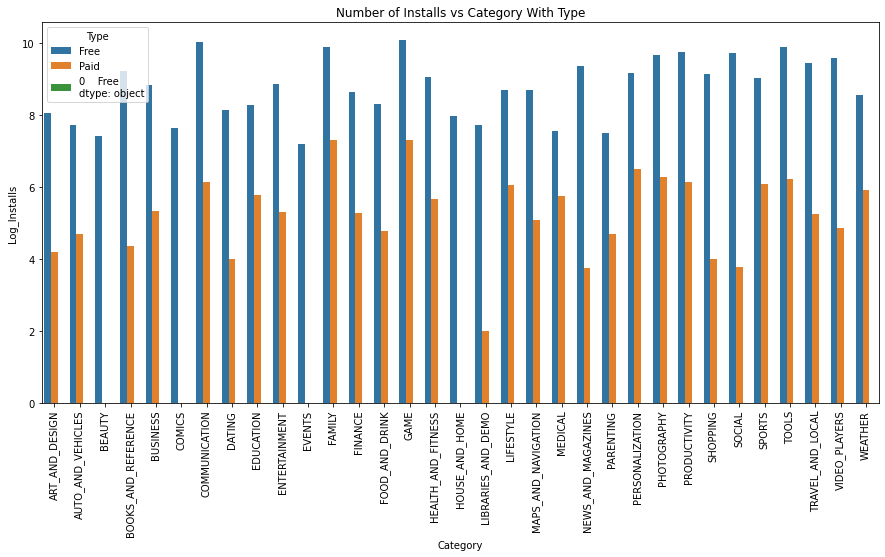

In [98]:
cat_type_install = ps_df.groupby(['Category','Type'])[['Installs']].sum().reset_index()
cat_type_install['Log_Installs'] = np.log10(cat_type_install['Installs'])

plt.figure(figsize=(15,7))
plt.title("Number of Installs vs Category With Type")

sns.barplot(x = 'Category', y = 'Log_Installs', hue = 'Type', data = cat_type_install)
plt.xticks(rotation = 90)
plt.show()

### **OBservation:**
1. **92%(Approx.) of apps in the google play store are free and 8%(Approx.) are paid.**

## **Graph 14 - Reviews vs Category**

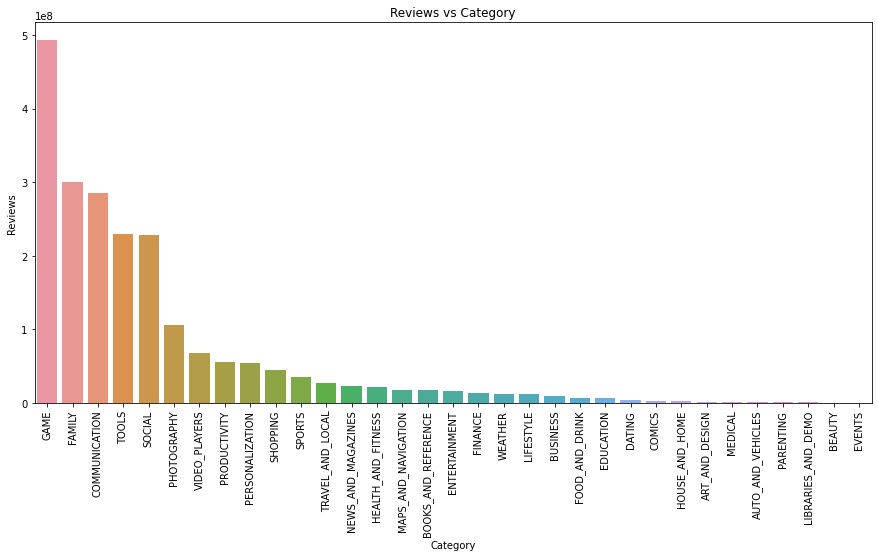

In [75]:
cat_review = ps_df.groupby(['Category'])[['Reviews']].sum().reset_index()
cat_review.sort_values(by = 'Reviews', ascending = False, inplace = True)

plt.figure(figsize=(15,7))
plt.title("Reviews vs Category")

sns.barplot(x = 'Category', y = 'Reviews', data = cat_review)
plt.xticks(rotation = 90)
plt.show()

##**Obeservation:**
1. **Top 5 categories having most number of reviews in the play store are - GAME, FAMILY, COMMUNICATION, TOOLS & SOCIAL.**

## **Graph 15 - Distribution of Size**

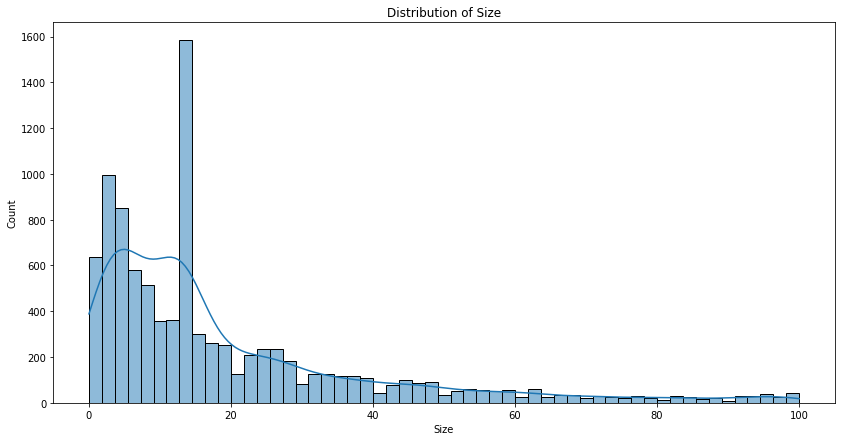

In [76]:
plt.figure(figsize=(14,7))
plt.title("Distribution of Size")

sns.histplot(ps_df['Size'], kde = True)
plt.show()

### **Observation:**
1. **Most of the apps are of smaller size.**
2. **Most of the apps are present in 5Mb-20Mb size in play store.**

## **Graph 16 - Correlation heat map for the play store dataset.**

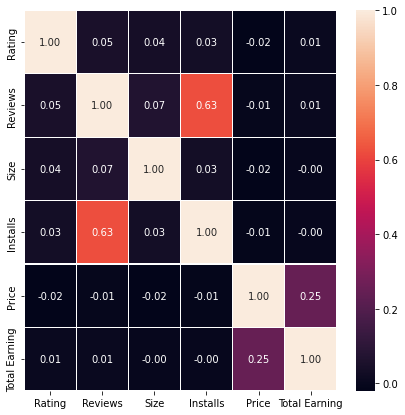

In [77]:
plt.figure(figsize = (7,7))
sns.heatmap(ps_df.corr(), annot = True, linewidths = 0.1, fmt = '0.2f')
plt.show()

### **Observation:**
1. **The relationship between the Installs and Reviews columns is 0.64.**

## **Merging the User Review dataset with the Play Store dataset.**

In [78]:
#Merging the User Review dataset with Play Store dataset in a new dataframe with name final_df.
final_df = ps_df.merge(ur_df, on = 'App')
final_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Total Earning,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
3008,Google,TOOLS,4.4,8033493,13.0,1000000000,Free,0.0,Everyone,Tools,2018-08-03,0.0,Excellent,Positive,1.000,1.000000
31960,Binaural Beats Therapy,HEALTH_AND_FITNESS,4.3,13724,13.0,1000000,Free,0.0,Everyone,Health & Fitness,2017-08-17,0.0,Just got tonight need learn first. Like I see ...,Positive,0.175,0.666667
13537,Hairstyles step by step,BEAUTY,4.6,4369,14.0,100000,Free,0.0,Everyone,Beauty,2018-07-25,0.0,good,Positive,0.700,0.600000
6356,EyeCloud,LIBRARIES_AND_DEMO,3.1,1267,55.0,100000,Free,0.0,Everyone,Libraries & Demo,2018-08-02,0.0,The great works. But crashes least three times...,Positive,0.250,0.575000
25990,Alto's Adventure,GAME,4.6,515657,63.0,10000000,Free,0.0,Everyone,Action,2018-06-05,0.0,"Remember I rated earlier, well I want change i...",Positive,0.200,0.300000


**There are three main columns in the User Review dataset - Sentiment, Sentiment_Polarity and Sentiment_Subjectivity.**
  * **Sentiment:** setniment is the view or opinion of the user about the app. the opinion may be Positive, Negative or Neutral.
  * **Sentiment_Polarity:** column contains values from -1 to 1. Where -1 is the most negative polarity and 1 is the most positive polarity. This column can also contain 0 which means neutral polarity.
  * **Sentiment_Subjectivity;** contains values ranging from 0 to 1. Where 0 being the very much objective sentence and 1 is very much subjective sentence. Subjectivity refers to the degree to which a person is personally involved in an object.

## **Graph 17 - Pie Chart for Sentiment**

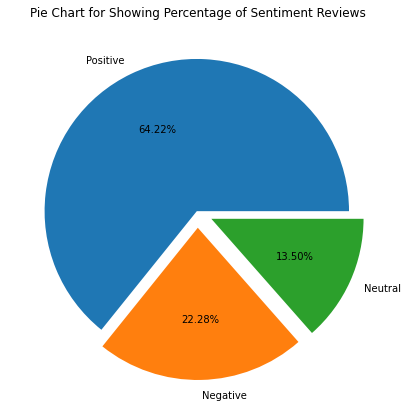

In [79]:
plt.figure(figsize = (7,7))
plt.title('Pie Chart for Showing Percentage of Sentiment Reviews')

final_df['Sentiment'].value_counts().plot.pie(autopct = '%1.2f%%', explode=(0.01,0.1,0.1))
plt.axis('off')
plt.show()

### **Observation**:
1. **The graph shows that there are 64.22% positive reviews, 13.50% Neutral reviews and 22.28% Negative reviews.**

## **Graph 18 - Distribution of Sentiment Polarity**

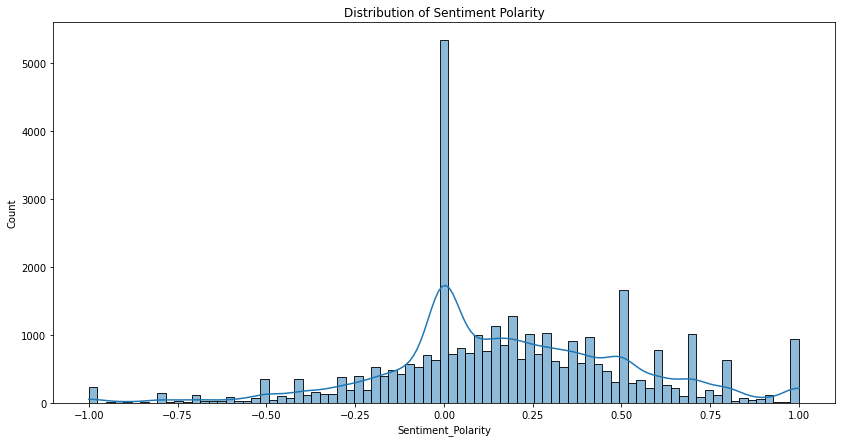

In [80]:
plt.figure(figsize=(14,7))
plt.title("Distribution of Sentiment Polarity")

sns.histplot(final_df['Sentiment_Polarity'], kde = True)
plt.show()

### **Observation**:
1. **The above graph shows that the width of the distribution is more towards the left of the graph which makes it left skewed.** 
2. **The Polarity of most of the users is towards the positive side as we already saw in the pie chart. Also, most of the reviews are having 0 polarity.**

## **Graph 19 - Histogram plot of Sentiment Subjectivity**

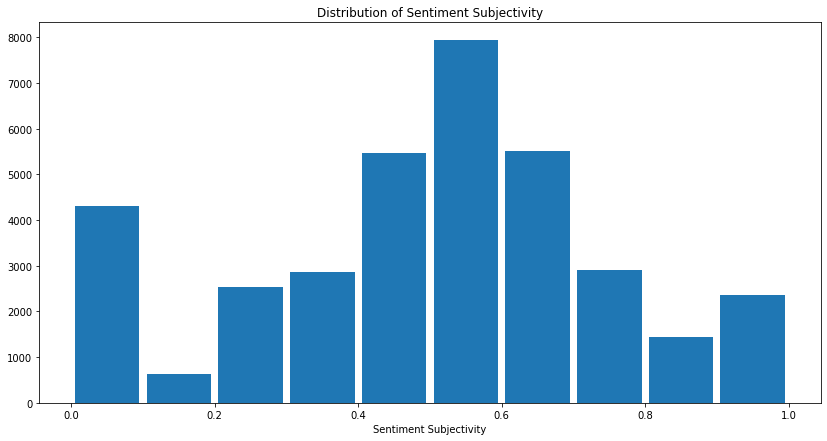

In [81]:
plt.figure(figsize=(14,7))
plt.title("Distribution of Sentiment Subjectivity")

plt.hist(final_df['Sentiment_Subjectivity'], rwidth = 0.90)
plt.xlabel("Sentiment Subjectivity")
plt.show()

### **Observation**:
1. **Highest sentiment subjectivity lies between 0.4 to 0.7 which shows that most of the reviews are towards subjective point of view of the users.**

In [82]:
cat_sentiment= final_df.groupby(['Category', 'Sentiment']).size().reset_index().pivot(columns = 'Sentiment', index = 'Category', values = 0)
cat_sentiment.head()

Sentiment,Negative,Neutral,Positive
Category,,,
ART_AND_DESIGN,61,62,259
AUTO_AND_VEHICLES,17,36,236
BEAUTY,65,88,185
BOOKS_AND_REFERENCE,95,108,448
BUSINESS,167,258,654


## **Graph 20 - Number of Apps vs Category with Reviews Sentiment Stacking**




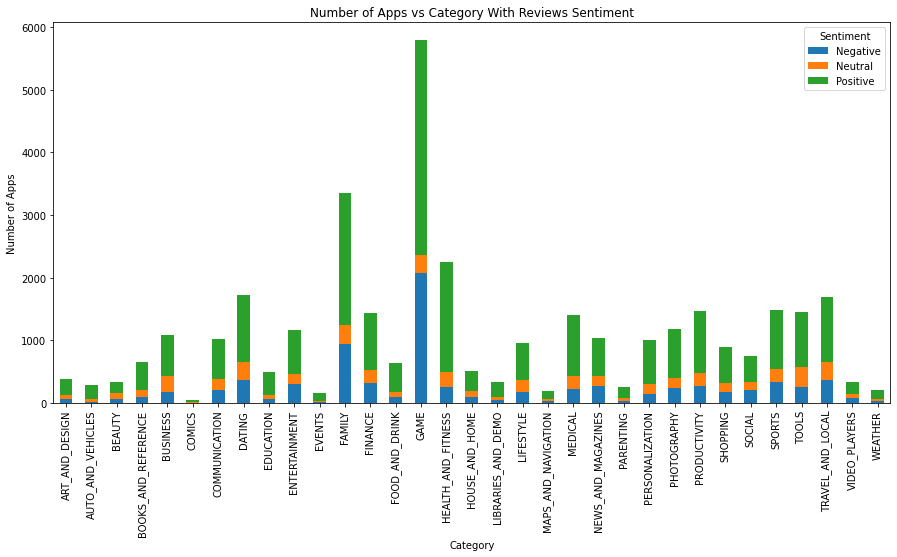

In [83]:
cat_sentiment.plot(kind = 'bar', stacked = True, figsize=(15,7))
plt.title("Number of Apps vs Category With Reviews Sentiment")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()

### **Observation**:
1. **Top 5 Categories with most positive reviews are - GAME, FAMILY, HEALTH_AND_FITNESS, DATING, TRAVEL_AND_LOCAL.**

## **Graph 21 - Correlation heat map for the final play store dataset.**

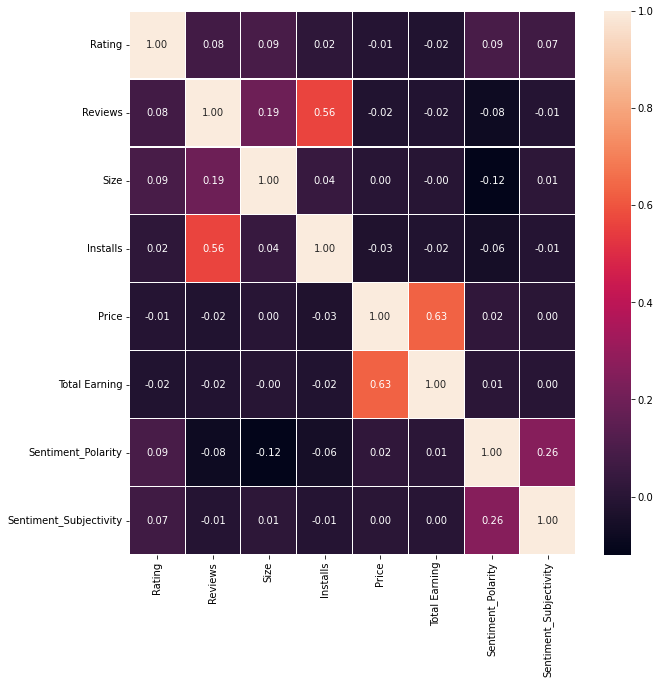

In [84]:
plt.figure(figsize = (10,10))
sns.heatmap(final_df.corr(), annot = True, linewidths = 0.1, fmt = '0.2f')
plt.show()

### **Observation**:
1. **Relationship between Install and Reviews is 0.56**
2. **Relationship between Total Earning and Price is 0.63**

# **Some more Insight from dataframe.**



In [85]:
#Number of rating given for apps in specific range.
pd.cut(ps_df['Rating'], bins=5).value_counts()

(4.2, 5.0]      5803
(3.4, 4.2]      3139
(2.6, 3.4]       547
(1.8, 2.6]       127
(0.996, 1.8]      43
Name: Rating, dtype: int64

In [86]:
#Top 5 most costly apps.
ps_df.nlargest(5, 'Price')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Total Earning
4197,most expensive app (H),FAMILY,4.3,6,1.5,100,Paid,400.0,Everyone,Entertainment,2018-07-16,40000.0
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41.0,1000,Paid,400.0,Everyone,Finance,2018-06-25,400000.0
5354,I am Rich Plus,FAMILY,4.0,856,8.7,10000,Paid,400.0,Everyone,Entertainment,2018-05-19,4000000.0
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.0,Everyone,Lifestyle,2018-05-03,4000000.0
5369,I am Rich,FINANCE,4.3,180,3.8,5000,Paid,400.0,Everyone,Finance,2018-03-22,2000000.0


In [87]:
#Top 5 most largest size app.
ps_df.nlargest(5, 'Size')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Total Earning
9170,Stickman Legends: Shadow Wars,GAME,4.4,38419,100.0,1000000,Paid,1.0,Everyone 10+,Action,2018-08-03,1000000.0
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100.0,5000,Free,0.0,Everyone,Health & Fitness,2018-08-02,0.0
5530,The Walking Dead: Our World,GAME,4.0,22435,100.0,1000000,Free,0.0,Teen,Action,2018-08-01,0.0
3973,Hungry Shark Evolution,GAME,4.5,6071542,100.0,100000000,Free,0.0,Teen,Arcade,2018-07-25,0.0
1080,Post Bank,FINANCE,4.5,60449,100.0,1000000,Free,0.0,Everyone,Finance,2018-07-23,0.0


In [88]:
#Top 5 most earned apps.
ps_df.nlargest(5, 'Total Earning')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Total Earning
4347,Minecraft,FAMILY,4.5,2375336,13.0,10000000,Paid,7.0,Everyone 10+,Arcade;Action & Adventure,2018-07-24,70000000.0
5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000,Paid,400.0,Everyone,Lifestyle,2018-01-12,40000000.0
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000,Paid,400.0,Everyone,Finance,2017-11-12,20000000.0
4034,Hitman Sniper,GAME,4.6,408292,29.0,10000000,Paid,1.0,Mature 17+,Action,2018-07-12,10000000.0
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.0,1000000,Paid,7.0,Mature 17+,Action,2015-03-21,7000000.0


In [89]:
#Top 5 most reviewed apps.
ps_df.nlargest(5, 'Reviews')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Total Earning
2544,Facebook,SOCIAL,4.1,78158306,13.0,1000000000,Free,0.0,Teen,Social,2018-08-03,0.0
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,13.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,0.0
3909,Instagram,SOCIAL,4.5,66509917,13.0,1000000000,Free,0.0,Teen,Social,2018-07-31,0.0
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,13.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,0.0
3986,Clash of Clans,FAMILY,4.6,44881447,98.0,100000000,Free,0.0,Everyone 10+,Strategy,2018-07-15,0.0


In [90]:
#Top 5 most installed apps.
ps_df.nlargest(5, 'Installs')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Total Earning
3232,Google Street View,TRAVEL_AND_LOCAL,4.2,2129707,13.0,1000000000,Free,0.0,Everyone,Travel & Local,2018-08-06,0.0
3523,Google Drive,PRODUCTIVITY,4.4,2731211,13.0,1000000000,Free,0.0,Everyone,Productivity,2018-08-06,0.0
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,13.0,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-06,0.0
2853,Google Photos,PHOTOGRAPHY,4.5,10858538,13.0,1000000000,Free,0.0,Everyone,Photography,2018-08-06,0.0
4234,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,13.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,0.0


In [91]:
#Top 5 apps with most positive reviews.
positive_review = ur_df[ur_df['Sentiment'] == 'Positive']
pos_review = positive_review.groupby(['App'])[['Sentiment']].count().reset_index()
pos_review.sort_values(by = 'Sentiment', ascending = False, inplace = True)
pos_review.head()

,App,Sentiment
805,Helix Jump,209
502,Duolingo: Learn Languages Free,200
324,Calorie Counter - Macros,174
325,Calorie Counter - MyFitnessPal,169
256,Bowmasters,169


In [92]:
#Top 5 apps with most negative reviews.
negative_review = ur_df[ur_df['Sentiment'] == 'Negative']
neg_review = negative_review.groupby(['App'])[['Sentiment']].count().reset_index()
neg_review.sort_values(by = 'Sentiment', ascending = False, inplace = True)
neg_review.head()

,App,Sentiment
103,Angry Birds Classic,147
298,Candy Crush Saga,126
236,Bowmasters,119
19,8 Ball Pool,106
299,Candy Crush Soda Saga,96


#**Inferences and Conclusion:**
In this EDA the given datasets are analysed and several graphs has been plotted which can be used to give more insights to the dataset.

* Distribution of Size shows most of the apps present in the play store are of smaller size.
* Minecraft is the only app in the paid category with over 10M installs. This app has also produced the most revenue only from the installation fee.
* Most of the apps present in the play store are available for everyone, there are very few apps which are having age restrictions. 
* Content Rating Teen is having highest number of installs.
    * It shows that the present youths are quite good at operating apps and thus developers can develop more apps which suits to the interest of the teens.
* Number of free apps present in the play store are higher than paid apps.
    * It's quite evident users prefer to install free apps more as compared to the paid apps.
    * This gives direction that the developers can launch more of the free apps and for earning money.
    * They can use other means such as through advertisements in the apps or monetizing certain section of the app which serves certain special purpose or any other means.
* Game category has a greater number of positive reviews as well as negative reviews since there is more installs from the Game category.
* From the correlation matrix we can infer that reviews and installs are having a good correlation.
  * It's quite evident as the more number of installs more will be the number of reviews. 
* Sentiment Polarity and Sentiment Subjectivity are slightly correlated.


The dataset contains possibilities to deliver insights to understand customer demands better and thus help developers to popularize the product. Dataset can also be used to look whether the original rating of the app matches the predicted rating to know whether the app is performing better or worse compared to other apps on the Play Store.